#Q1

The main difference between Euclidean distance and Manhattan distance lies in how they measure the distance between two points in a multi-dimensional space.

Euclidean Distance:

Euclidean distance is the straight-line distance between two points in a Euclidean space.

In two dimensions, it is calculated as the square root of the sum of the squared differences between corresponding coordinates.

 
Manhattan Distance:

Manhattan distance, also known as L1 distance or taxicab distance, is the sum of the absolute differences between corresponding coordinates.

In two dimensions, it is calculated as the sum of the absolute differences in the x and y coordinates.

 ∣
The choice between Euclidean and Manhattan distance can significantly affect the performance of a k-nearest neighbors (KNN) classifier or regressor. The impact can be observed based on the nature of the data and the underlying geometric structure.

In [1]:
#1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate KNN classifier with specified distance metric
def knn_classifier(distance_metric, n_neighbors):
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance_metric)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Evaluate KNN with Euclidean distance
euclidean_accuracy = knn_classifier(distance_metric='euclidean', n_neighbors=3)
print(f'Accuracy with Euclidean distance: {euclidean_accuracy:.2f}')

# Evaluate KNN with Manhattan distance
manhattan_accuracy = knn_classifier(distance_metric='manhattan', n_neighbors=3)
print(f'Accuracy with Manhattan distance: {manhattan_accuracy:.2f}')

Accuracy with Euclidean distance: 1.00
Accuracy with Manhattan distance: 1.00


#Q2 
 
Choosing the optimal value of k in a k-nearest neighbors (KNN) classifier or regressor is a crucial step as it directly influences the model's performance. There are several techniques to determine the optimal k value. Two common approaches are:

Grid Search:

This method involves evaluating the model's performance for a range of k values and selecting the one that yields the best results.
It's common to use cross-validation during grid search to get a more robust estimate of the model's performance.

Elbow Method:

The elbow method is an intuitive technique that involves plotting the model's performance against different k values and looking for an "elbow" point where the performance improvement starts to diminish.

Optimal k value using Grid Search: 3


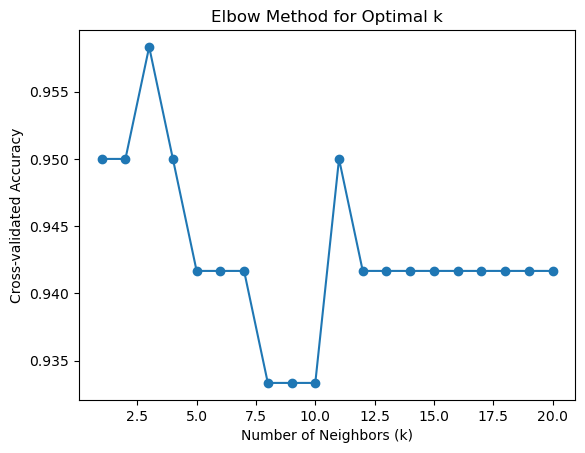

In [2]:
#2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search for optimal k
def grid_search_k(X_train, y_train, max_k=20):
    k_values = list(range(1, max_k + 1))
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracy = np.mean(cross_val_score(knn, X_train, y_train, cv=5))
        accuracies.append(accuracy)

    optimal_k = k_values[np.argmax(accuracies)]
    return optimal_k

optimal_k_grid_search = grid_search_k(X_train, y_train)
print(f'Optimal k value using Grid Search: {optimal_k_grid_search}')

# Elbow Method for optimal k
def elbow_method(X_train, y_train, max_k=20):
    k_values = list(range(1, max_k + 1))
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracy = np.mean(cross_val_score(knn, X_train, y_train, cv=5))
        accuracies.append(accuracy)

    # Plotting the elbow curve
    plt.plot(k_values, accuracies, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Cross-validated Accuracy')
    plt.show()

elbow_method(X_train, y_train)

#Q3

The choice of distance metric in KNN can significantly impact the performance of the model. Two common distance metrics are Euclidean distance and Manhattan distance.

Euclidean Distance:

Suitable for datasets where features have similar scales.
Sensitive to outliers.
May not perform well when the dimensions are not relevant or have different importance.

Manhattan Distance:

Less sensitive to outliers.
Appropriate when the features have different scales.
Works well when only a few dimensions are relevant.
Example with Code:

In [3]:
#3
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate KNN classifier with specified distance metric
def knn_classifier(distance_metric, n_neighbors):
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance_metric)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Evaluate KNN with Euclidean distance
euclidean_accuracy = knn_classifier(distance_metric='euclidean', n_neighbors=3)
print(f'Accuracy with Euclidean distance: {euclidean_accuracy:.2f}')

# Evaluate KNN with Manhattan distance
manhattan_accuracy = knn_classifier(distance_metric='manhattan', n_neighbors=3)
print(f'Accuracy with Manhattan distance: {manhattan_accuracy:.2f}')

Accuracy with Euclidean distance: 1.00
Accuracy with Manhattan distance: 1.00


#Q4

Common hyperparameters in KNN include:

n_neighbors: Number of neighbors to consider.

weights: Weights assigned to neighbors (uniform or distance-based).

p: Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean).

Tuning these hyperparameters is crucial for improving model performance.

In [4]:
#4
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_knn = grid_search.best_estimator_
best_accuracy = best_knn.score(X_test, y_test)
print(f'Accuracy with Best Hyperparameters: {best_accuracy:.2f}')

Best Hyperparameters: {'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}
Accuracy with Best Hyperparameters: 1.00


In [5]:
#Q5 

#The size of the training set can impact KNN performance.
#A smaller dataset may lead to overfitting, while a larger dataset may increase computation time.

sizes = [0.2, 0.4, 0.6, 0.8]
for size in sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Train and evaluate KNN with the subset
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_subset, y_train_subset)
    
    accuracy = knn.score(X_test, y_test)
    print(f'Training Set Size: {size}, Accuracy: {accuracy:.2f}')

Training Set Size: 0.2, Accuracy: 0.97
Training Set Size: 0.4, Accuracy: 0.97
Training Set Size: 0.6, Accuracy: 0.97
Training Set Size: 0.8, Accuracy: 1.00


#Q6 

#Drawbacks of KNN:

Computational Cost: KNN can be computationally expensive, especially with large datasets.

Sensitivity to Scale: Features with larger scales dominate the distance calculations.

Impact of Outliers: Outliers can significantly affect predictions.

Curse of Dimensionality: Performance may degrade as the number of dimensions increases.

#Overcoming Drawbacks:

Normalization/Standardization: Scale features to have similar magnitudes.

Dimensionality Reduction: Reduce irrelevant or highly correlated features.

Outlier Handling: Remove or handle outliers.

Algorithmic Improvements: Approximate nearest neighbors, use tree-based structures.

In [8]:
#6
#demonstrating normalization and handling outliers.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data
y_class = iris.target
y_reg = iris.target  # Using the same dataset for regression for illustration purposes

# Split the dataset into training and testing sets
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)


# Assuming a classification scenario
scaler = StandardScaler()
X_class_train_scaled = scaler.fit_transform(X_train)
X_class_test_scaled = scaler.transform(X_test)

knn_class = KNeighborsClassifier(n_neighbors=3)
knn_class.fit(X_class_train_scaled, y_class_train)
y_class_pred = knn_class.predict(X_class_test_scaled)
accuracy_with_scaling = accuracy_score(y_class_test, y_class_pred)
print(f'Accuracy with Scaling: {accuracy_with_scaling:.2f}')

# Assuming a regression scenario
X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.transform(X_reg_test)

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_reg_train_scaled, y_reg_train)
y_reg_pred = knn_reg.predict(X_reg_test_scaled)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f'Mean Squared Error with Scaling: {mse:.2f}')


Accuracy with Scaling: 1.00
Mean Squared Error with Scaling: 0.01
